# Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional, GRU
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from keras.optimizers import Adam

# Import dataset

In [ ]:
dataset_path = ('data.csv')
df = pd.read_csv(dataset_path)

# Detach a single OD traffic

In [ ]:
od_number = 1
dataset = df.iloc[:, od_number]
dataset = dataset.astype('float32')
dataset = dataset.values
dataset = np.reshape(dataset,(-1,1))
dataset

array([[3456.],
       [3504.],
       [3496.],
       ...,
       [ 114.],
       [ 113.],
       [ 112.]], dtype=float32)

# Data preparation

In [ ]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
	    a = dataset[i:(i+look_back), 0]
	    dataX.append(a)
	    dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
np.random.seed(7)

look_back = 8
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("train_data_size: " + str(trainX.shape[0]), " test_data_size: " + str(testX.shape[0]))

train_data_size: 4791  test_data_size: 1191


In [ ]:
print(testY)

[0.06836327 0.07069194 0.07052561 ... 0.000499   0.00033267 0.00016633]


# Build models

In [ ]:
lstm = Sequential()
lstm.add(LSTM(4, input_shape=(1, look_back)))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 4)                   │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Bilstm_model = Sequential()
Bilstm_model.add(Bidirectional(LSTM(50, activation="relu"),input_shape=(1, look_back)))
Bilstm_model.add(Dense(1))

Bilstm_model.compile(loss='mean_squared_error', optimizer='adam' )


Bilstm_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional)      │ (None, 100)                 │          23,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,701 (92.58 KB)

 Trainable params: 23,701 (92.58 KB)

 Non-trainable params: 0 (0.00 B)

# Feed data into models

In [ ]:
lstm.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/100
105/105 - 3s - 25ms/step - loss: 0.0281 - val_loss: 0.0027
Epoch 2/100
105/105 - 1s - 10ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 3/100
105/105 - 0s - 4ms/step - loss: 0.0013 - val_loss: 5.9369e-04
Epoch 4/100
105/105 - 1s - 6ms/step - loss: 5.5848e-04 - val_loss: 1.5034e-04
Epoch 5/100
105/105 - 1s - 5ms/step - loss: 3.0361e-04 - val_loss: 6.5301e-05
Epoch 6/100
105/105 - 0s - 4ms/step - loss: 2.4709e-04 - val_loss: 5.6534e-05
Epoch 7/100
105/105 - 1s - 6ms/step - loss: 2.3513e-04 - val_loss: 5.7096e-05
Epoch 8/100
105/105 - 1s - 6ms/step - loss: 2.3020e-04 - val_loss: 5.6950e-05
Epoch 9/100
105/105 - 1s - 5ms/step - loss: 2.2600e-04 - val_loss: 6.1016e-05
Epoch 10/100
105/105 - 1s - 7ms/step - loss: 2.2295e-04 - val_loss: 6.3174e-05
Epoch 11/100
105/105 - 1s - 10ms/step - loss: 2.1907e-04 - val_loss: 6.9752e-05
Epoch 12/100
105/105 - 0s - 4ms/step - loss: 2.1415e-04 - val_loss: 6.6701e-05
Epoch 13/100
105/105 - 1s - 7ms/step - loss: 2.1072e-04 - val_loss: 7.1407e-05

Epoch 1/200
150/150 - 4s - 29ms/step - loss: 0.0110 - val_loss: 0.0018
Epoch 2/200
150/150 - 1s - 4ms/step - loss: 3.4304e-04 - val_loss: 0.0010
Epoch 3/200
150/150 - 1s - 9ms/step - loss: 3.0340e-04 - val_loss: 8.0013e-04
Epoch 4/200
150/150 - 1s - 5ms/step - loss: 2.5245e-04 - val_loss: 4.8855e-04
Epoch 5/200
150/150 - 2s - 10ms/step - loss: 2.0560e-04 - val_loss: 2.2462e-04
Epoch 6/200
150/150 - 1s - 5ms/step - loss: 1.7648e-04 - val_loss: 1.6652e-04
Epoch 7/200
150/150 - 1s - 7ms/step - loss: 1.6585e-04 - val_loss: 1.5250e-04
Epoch 8/200
150/150 - 1s - 8ms/step - loss: 1.6128e-04 - val_loss: 1.2036e-04
Epoch 9/200
150/150 - 1s - 4ms/step - loss: 1.5608e-04 - val_loss: 1.2092e-04
Epoch 10/200
150/150 - 1s - 8ms/step - loss: 1.4813e-04 - val_loss: 1.1966e-04
Epoch 11/200
150/150 - 1s - 4ms/step - loss: 1.4525e-04 - val_loss: 1.1821e-04
Epoch 12/200
150/150 - 1s - 4ms/step - loss: 1.3770e-04 - val_loss: 1.0467e-04
Epoch 13/200
150/150 - 1s - 5ms/step - loss: 1.3478e-04 - val_loss: 1.3

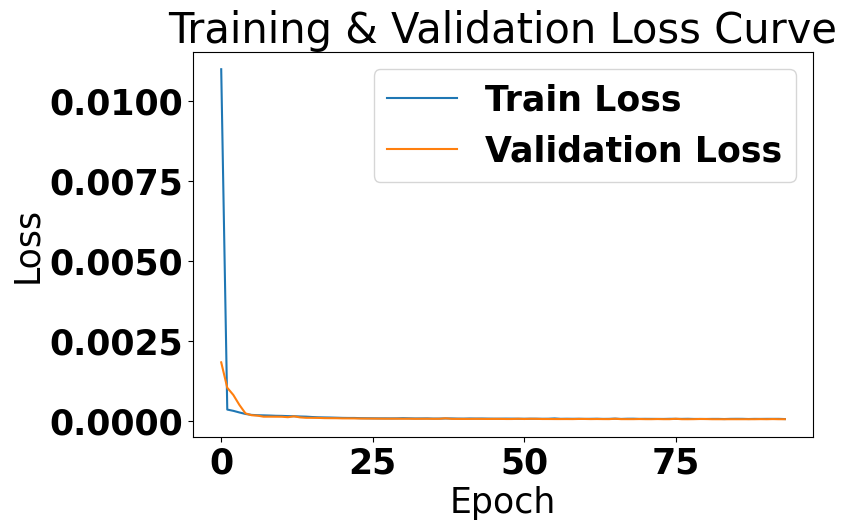

In [ ]:


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True, mode='min')

history = Bilstm_model.fit(trainX, trainY,
                     validation_data=(testX, testY),
                     epochs=200, batch_size=32,
                     verbose=2, callbacks=[early_stopping])

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss Curve')
plt.show()

In [ ]:
Bilstm_model.fit(trainX, trainY, epochs=85, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/85
105/105 - 1s - 7ms/step - loss: 1.0817e-04 - val_loss: 2.8306e-05
Epoch 2/85
105/105 - 1s - 6ms/step - loss: 1.0813e-04 - val_loss: 2.8306e-05
Epoch 3/85
105/105 - 0s - 4ms/step - loss: 1.0809e-04 - val_loss: 2.8307e-05
Epoch 4/85
105/105 - 1s - 6ms/step - loss: 1.0808e-04 - val_loss: 2.8310e-05
Epoch 5/85
105/105 - 1s - 6ms/step - loss: 1.0806e-04 - val_loss: 2.8311e-05
Epoch 6/85
105/105 - 1s - 6ms/step - loss: 1.0807e-04 - val_loss: 2.8316e-05
Epoch 7/85
105/105 - 0s - 4ms/step - loss: 1.0808e-04 - val_loss: 2.8310e-05
Epoch 8/85
105/105 - 1s - 6ms/step - loss: 1.0806e-04 - val_loss: 2.8315e-05
Epoch 9/85
105/105 - 1s - 5ms/step - loss: 1.0806e-04 - val_loss: 2.8313e-05
Epoch 10/85
105/105 - 1s - 7ms/step - loss: 1.0804e-04 - val_loss: 2.8306e-05
Epoch 11/85
105/105 - 0s - 4ms/step - loss: 1.0803e-04 - val_loss: 2.8308e-05
Epoch 12/85
105/105 - 0s - 4ms/step - loss: 1.0802e-04 - val_loss: 2.8304e-05
Epoch 13/85
105/105 - 1s - 5ms/step - loss: 1.0802e-04 - val_loss: 2.8302

In [ ]:

print(f"EarlyStopping stopped at epoch: {early_stopping.stopped_epoch}")
print(f"Best validation loss recorded: {min(history.history['val_loss'])}")
current_lr = Bilstm_model.optimizer.learning_rate.numpy()
print(f"Final learning rate: {current_lr:.6f}")


EarlyStopping stopped at epoch: 43
Best validation loss recorded: 0.00011049293971154839
Final learning rate: 0.001000


# Evaluation

In [ ]:
lstm_predict = lstm.predict(testX)
lstm_result = scaler.inverse_transform(lstm_predict)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
bilstm_predict = Bilstm_model.predict(testX)
bilstm_result = scaler.inverse_transform(bilstm_predict)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [ ]:
true_testY = scaler.inverse_transform(testY.reshape(-1, 1))

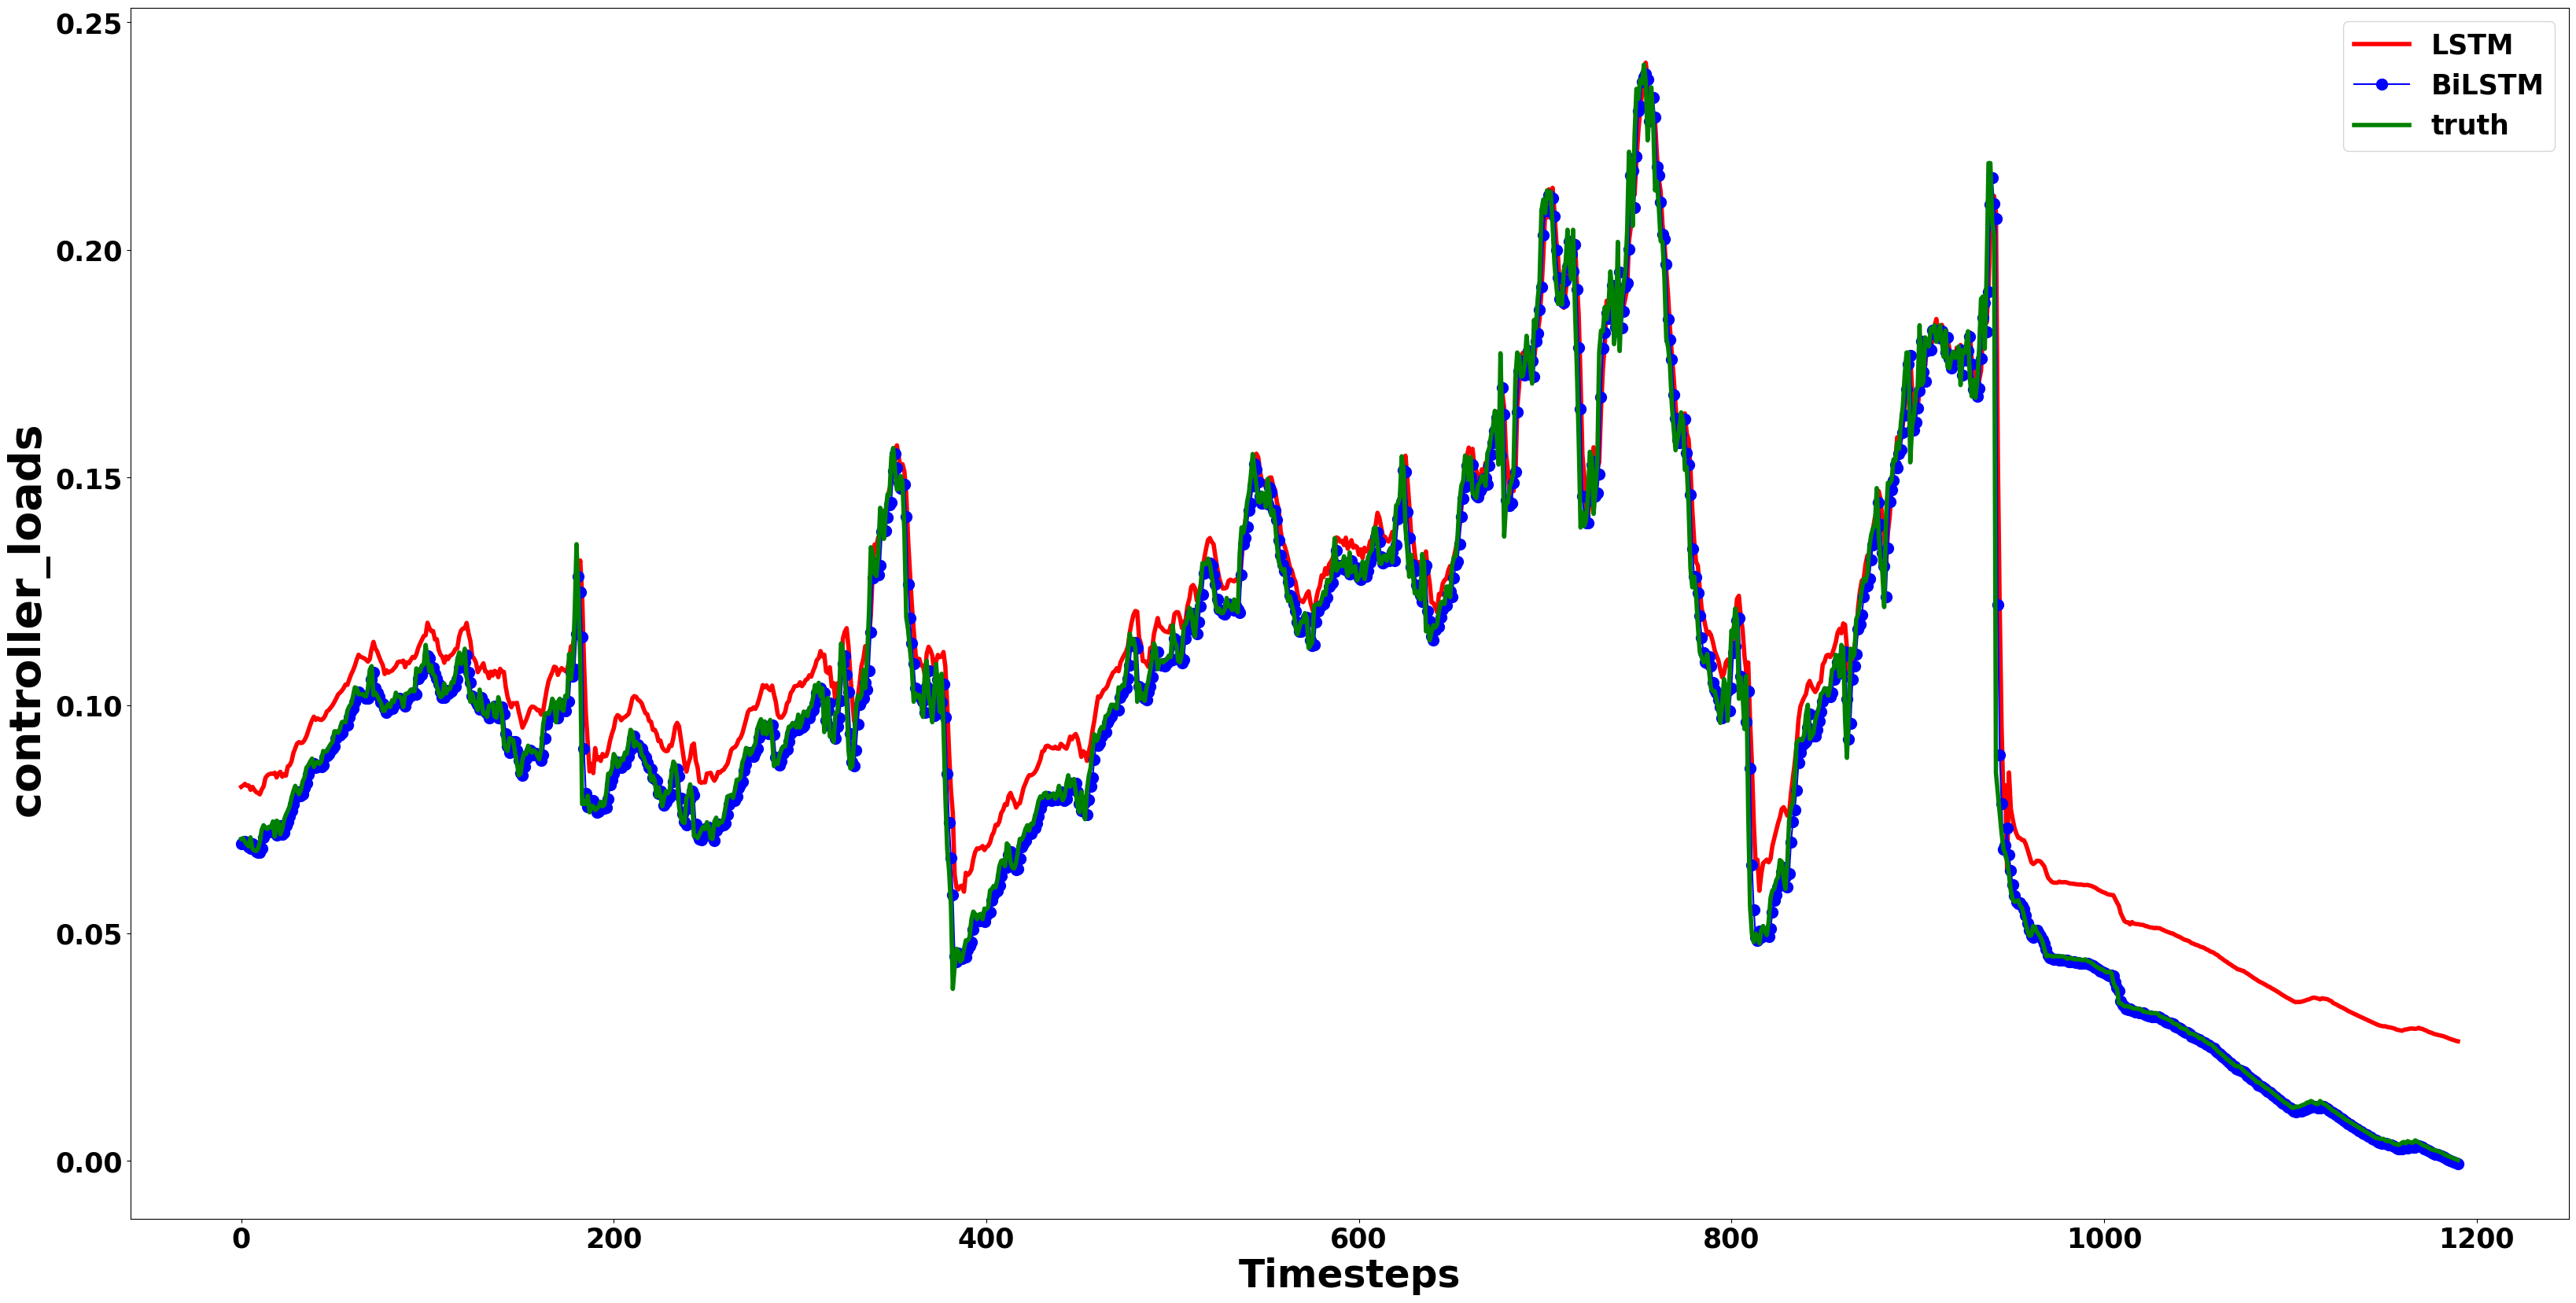

In [ ]:
plt.rcParams["figure.figsize"] = (40,20)
plt.rcParams.update({'font.size': 25, 'font.weight' : 'bold'})
plt.plot(lstm_result[:, 0], label = "LSTM",linewidth=4,color='red')
plt.plot(bilstm_result[:, 0], label = "BiLSTM", color='b',marker='o',markersize=10)
plt.plot(true_testY[:, 0], label = "truth",linewidth=4,color = 'g')
plt.xlabel('Timesteps', fontweight='bold', fontsize=35)
plt.ylabel('controller_loads ', fontweight='bold', fontsize = 40)
plt.legend()

# Calculate RMSE

In [ ]:
lstm_temp = 0
bi_temp = 0


for i in range(len(testY)):
    lstm_temp += (testY[i] - lstm_predict[i])**2
    bi_temp += (testY[i] - bilstm_predict[i])**2

v_rmse = math.sqrt(lstm_temp / len(testY))
b_rmse = math.sqrt(bi_temp / len(testY))

<ipython-input-31-a084caca04f3>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_rmse = math.sqrt(lstm_temp / len(testY))
<ipython-input-31-a084caca04f3>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_rmse = math.sqrt(bi_temp / len(testY))


<BarContainer object of 2 artists>

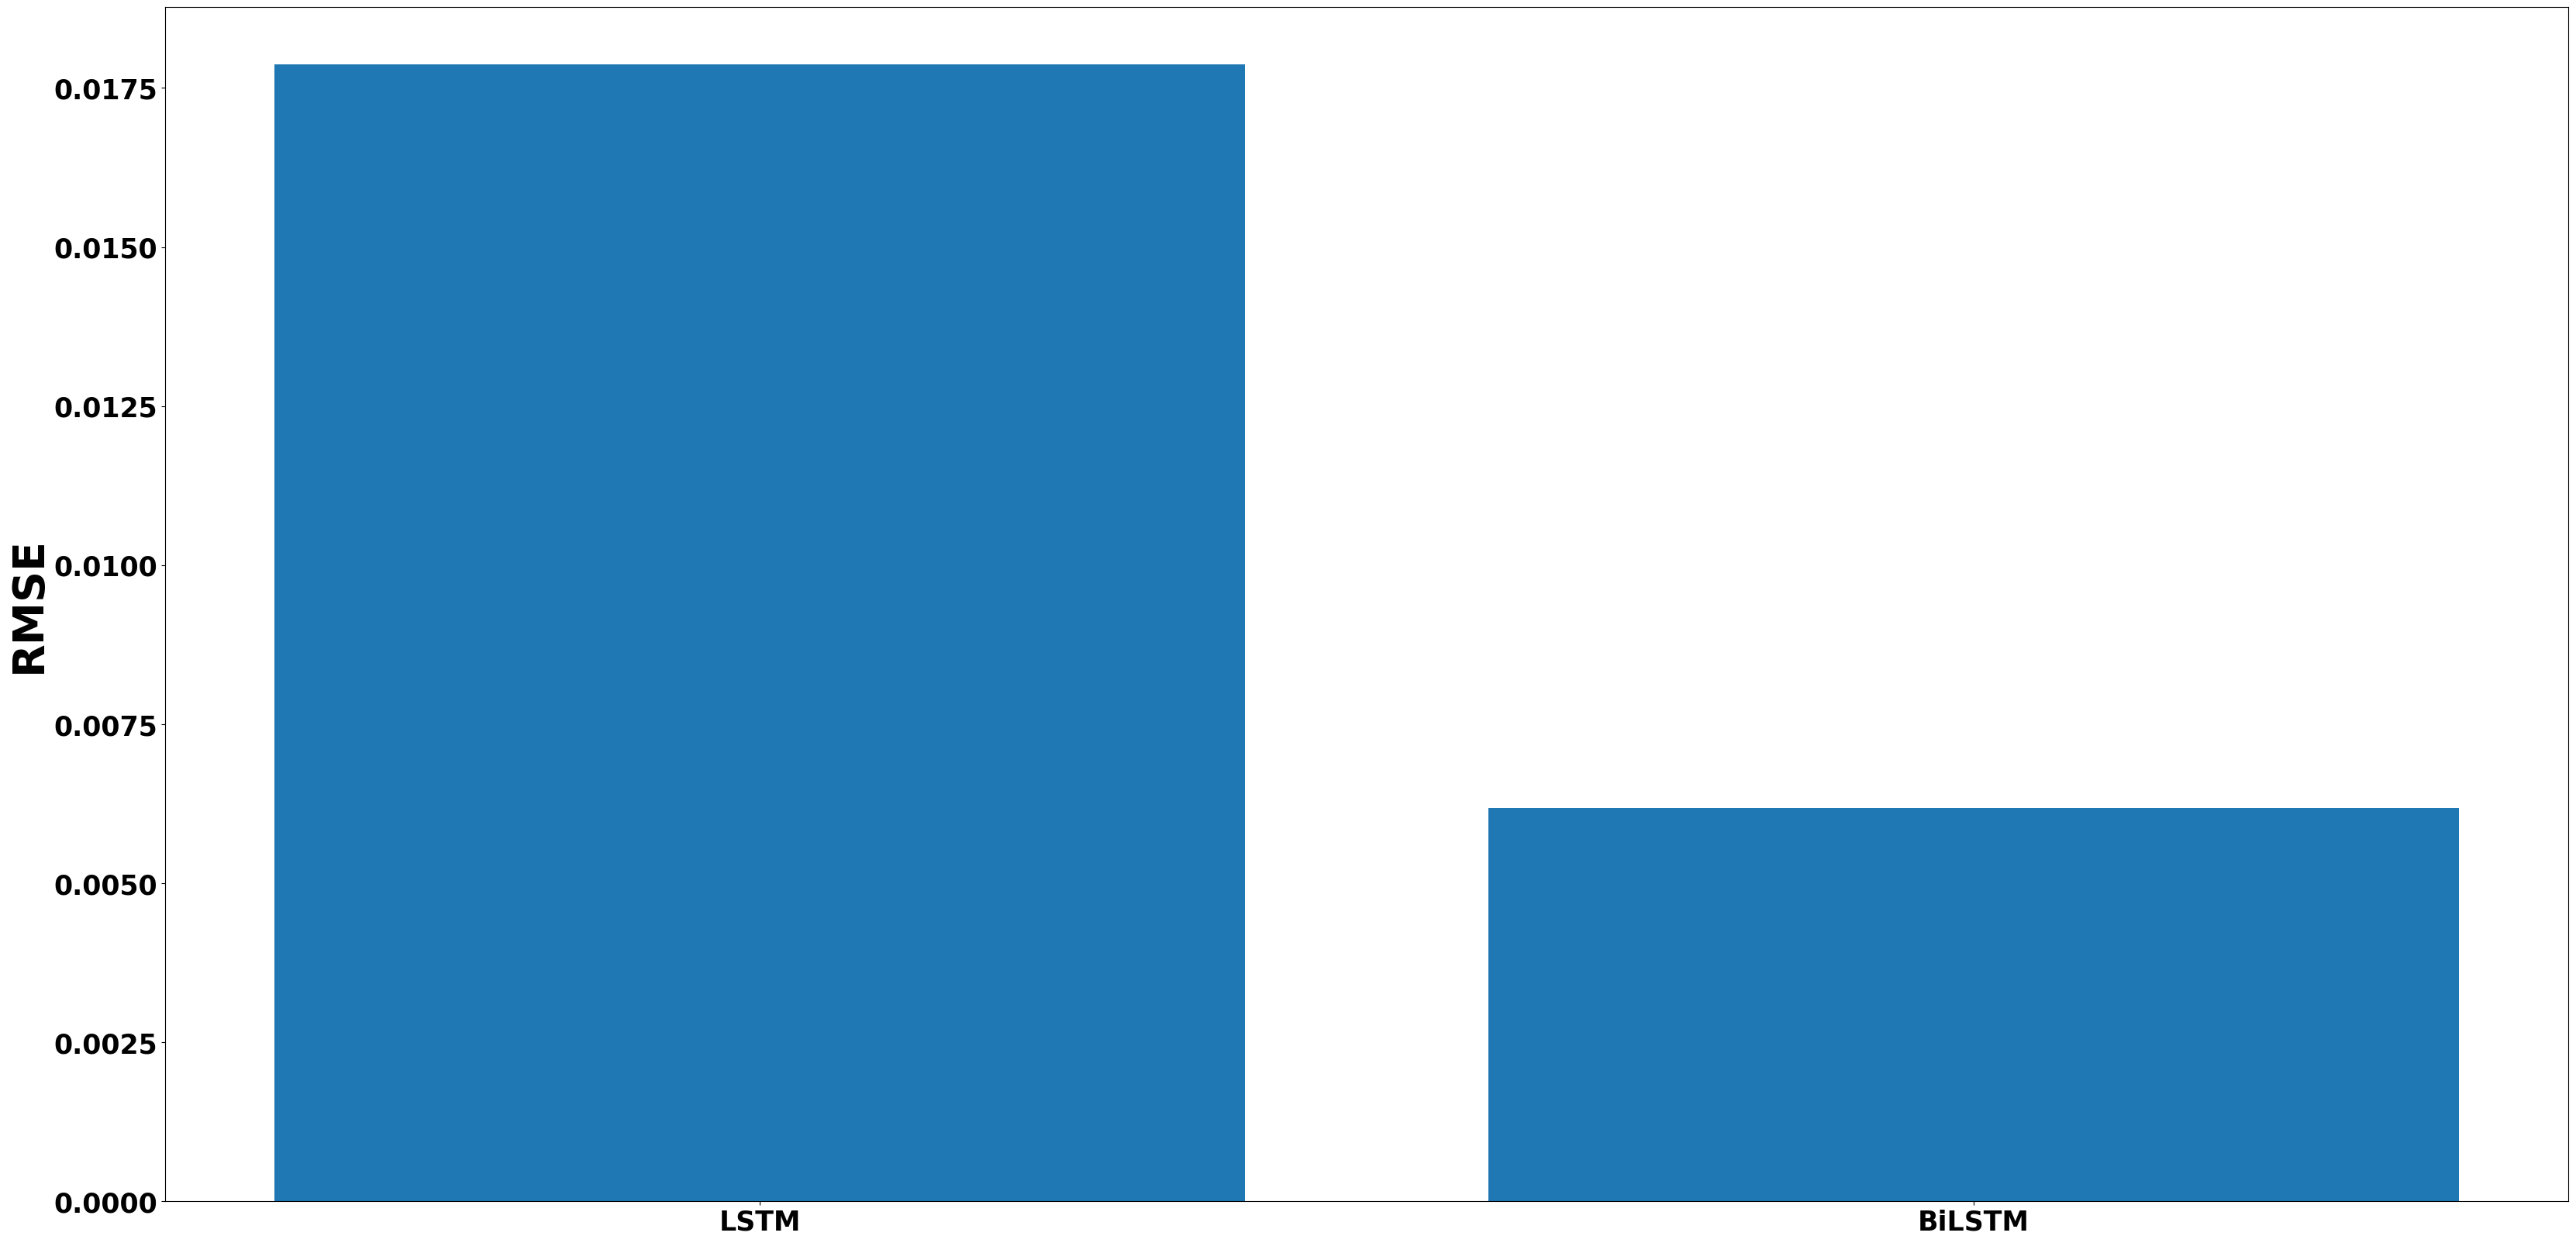

In [ ]:
fig = plt.figure()
names = ['LSTM', 'BiLSTM']
values = [v_rmse,b_rmse]
plt.ylabel('RMSE', fontweight='bold',fontsize= 40)
# plt.ylim([0.006,0.0125])
plt.bar(names,values)

MSE,MAE,R^2

In [ ]:
lstm_mse = mean_squared_error(true_testY, lstm_result)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(true_testY, lstm_result)
lstm_r2 = r2_score(true_testY, lstm_result)



bilstm_mse = mean_squared_error(true_testY, bilstm_result)
bilstm_rmse = np.sqrt(bilstm_mse)
bilstm_mae=mean_absolute_error(true_testY, bilstm_result)
bilstm_r2 =r2_score(true_testY, bilstm_result)

print(f'Test MSE: {lstm_mse}')
print(f'Test RMSE: {lstm_rmse}')
print(f'Test MAE: {lstm_mae}')
print(f'Test R^2: {lstm_r2}')

print(f'Test MSE: {bilstm_mse}')
print(f'Test RMSE: {bilstm_rmse}')
print(f'Test MAE: {bilstm_mae}')
print(f'Test R^2: {bilstm_r2}')

Test MSE: 0.000195428729057312
Test RMSE: 0.01397958257807836
Test MAE: 0.011610888876020908
Test R^2: 0.9246090650558472
Test MSE: 0.00011470784374978393
Test RMSE: 0.01071017477680845
Test MAE: 0.006715147290378809
Test R^2: 0.9557489156723022
